In [ ]:
#Given a bank customer, build a neural network-based classifier that can 
#determine whether they will leave or not in the next 6 months. Dataset Description: 
#The case study is from an open-source dataset from Kaggle. The dataset contains 
#10,000 sample points with 14 distinct features such as CustomerId,
#CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

#Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
#Perform following steps:

#Read the dataset.
#Distinguish the feature and target set and divide the data set into training and test sets.
#Normalize the train and test data.
#Initialize and build the model. Identify the points of improvement and implement the same.
#Print the accuracy score and confusion matrix (5 points).

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

C:\Users\Riya Patil\Documents\New folder\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('C:\\Users\\Riya Patil\\Desktop\\LP3\\ML\\churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [7]:
#Exploratory Data Analysis (EDA)
df.isnull()
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
#Data Preprocessing
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#Visualisation
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['yellow', 'blue'], label = ['exited', 'not_exited'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel('No. of customers', fontsize=20)
    plt.legend()

In [13]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

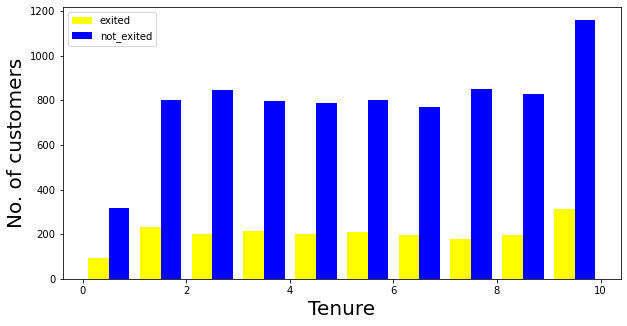

In [14]:
visualization(df_churn_exited, df_churn_not_exited, 'Tenure')

In [15]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

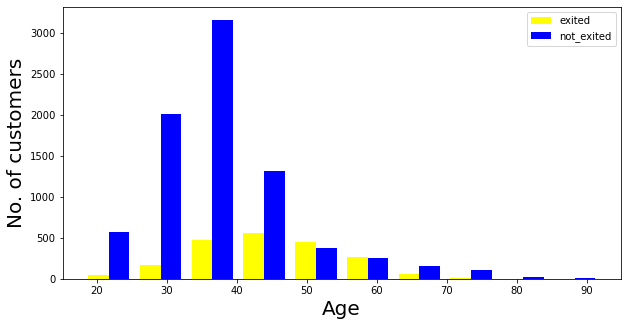

In [16]:
visualization(df_churn_exited2, df_churn_not_exited2, 'Age')

In [17]:
x = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
        'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
states = pd.get_dummies(df['Geography'], drop_first = True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [18]:
df = pd.concat([df,gender,states], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [19]:
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain']]
y = df['Exited']

In [20]:
#Splitting the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [21]:
#Normalising the Data
sc = StandardScaler()

In [22]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
print('Training Data:\n',x_train)

Training Data:
 [[-0.58798976 -0.09377235 -0.35658852 ... -1.08628092  1.74467913
  -0.57866993]
 [ 0.62788396 -1.22437046  1.36915791 ...  0.92057219  1.74467913
  -0.57866993]
 [ 0.45271572 -0.18798886  1.71430719 ...  0.92057219 -0.5731713
  -0.57866993]
 ...
 [ 0.04055513 -0.94172093  0.67885934 ...  0.92057219 -0.5731713
  -0.57866993]
 [ 0.52484382 -0.37642187  1.36915791 ... -1.08628092 -0.5731713
   1.72810086]
 [ 1.39038105 -0.56485489  0.33371005 ... -1.08628092  1.74467913
  -0.57866993]]


In [24]:
print('Testing Data:\n',x_test)

Testing Data:
 [[-0.44373356 -0.28220536 -0.35658852 ... -1.08628092 -0.5731713
   1.72810086]
 [ 0.47332374  0.28309369  0.67885934 ...  0.92057219  1.74467913
  -0.57866993]
 [-0.48494962 -1.41280348 -1.39203637 ...  0.92057219 -0.5731713
   1.72810086]
 ...
 [ 0.43210769 -0.47063838 -0.35658852 ... -1.08628092 -0.5731713
   1.72810086]
 [ 0.14359528 -0.09377235 -0.35658852 ... -1.08628092 -0.5731713
  -0.57866993]
 [-1.49474305 -1.22437046  1.02400862 ...  0.92057219 -0.5731713
  -0.57866993]]


In [25]:
#Building the Neural Network Model
classifier = Sequential()

In [26]:
classifier.add(Input(shape=(10,)))

In [27]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Training the Model
classifier.fit(x_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6601 - loss: 0.6137
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8010 - loss: 0.4471
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7994 - loss: 0.4356
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8164 - loss: 0.4212
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8266 - loss: 0.4037
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.8264 - loss: 0.4099
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.8294 - loss: 0.3971
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8322 - loss: 0.4017
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8273 - loss: 0.4135
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8356 - loss: 0.4031
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.8389 - loss: 0.3863
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [30]:
#Evaluating the Model
y_pred =classifier.predict(x_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[2294   76]
 [ 362  268]]


In [32]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)

Accuracy Score: 0.854


Text(69.0, 0.5, 'Truth')

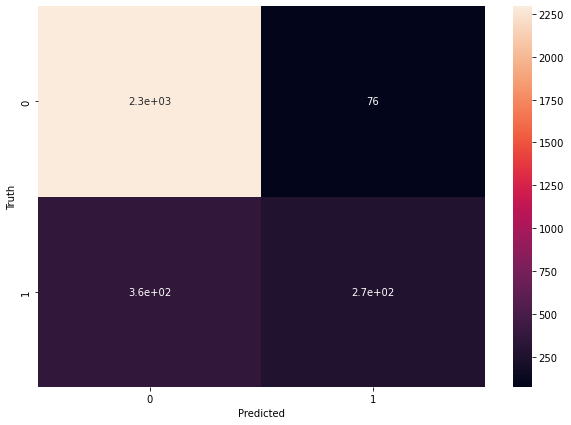

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2370
           1       0.78      0.43      0.55       630

    accuracy                           0.85      3000
   macro avg       0.82      0.70      0.73      3000
weighted avg       0.85      0.85      0.84      3000

